# Visualisierungen in Python mit Seaborn (und Matplotlib)

Hinweis: Einige Plots erfordern u.U. die Installation von 0.11 von Seaborn. 

--------------------------
### Aufgabe 1: Nachbilden eines Diagramms in Seaborn (8 Punkte)

Laden Sie den Datensatz "tips" in Seaborn (``sns.load_dataset("tips")``). 
Bilden Sie anschließend die unten gezeigte Visualisierung in Seaborn nach. 

Einige Hinweise: 
* Auf der x-Achse liegt das Attribut "total_bill"
* Auf der y-Achse das Attribut "tip"
* Für die Einfärbung gilt: "nieder" = weniger als 15% des Rechnungsbetrags als Trinkgeld, "normal" = 15-20%, "hoch" = mehr als 20% (entsprechend der Trinkgeld-Gepflogenheiten in den USA)
* Verwendet werden Kreuze als Marker, deren Größe auf 100 gesetzt ist
* Tipp: Die Density Plots für die x- und y-Achse bekommen Sie automatisch, wenn Sie die richtige Plot-Funktion wählen!

<img src="./img/Trinkgeld-Visualisierung.jpg" width = 400>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("tips")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
# creating new feature for coloring
conditions = [(df.tip/df.total_bill < 0.15), (df.tip/df.total_bill >= 0.15) & (df.tip/df.total_bill <= 0.2), (df.tip/df.total_bill > 0.2)]
values = ['nieder', 'normal', 'hoch']
df['angemessen?'] = np.select(conditions, values)

In [4]:
df['angemessen?']

0      nieder
1      normal
2      normal
3      nieder
4      nieder
        ...  
239      hoch
240    nieder
241    nieder
242    nieder
243    normal
Name: angemessen?, Length: 244, dtype: object

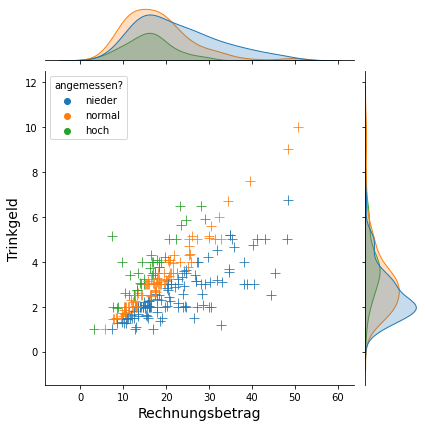

In [5]:
ax = sns.jointplot(x=df.total_bill, y=df.tip, hue=df['angemessen?'], marker='+', s=100)
ax.set_axis_labels("Rechnungsbetrag", "Trinkgeld", fontsize=14)

----------------------------
### Aufgabe 2: Nachbilden eines Diagramms mit Subplots (4 Punkte)

Unten sehen Sie nochmals den Subplot aus Aufgabe 2 des ersten Übungsblattes. Bilden Sie diesen erneut nach, dieses Mal aber in Seaborn. Ihre Graphik sollte genauso aussehen wie im gezeigten Screenshot. Die Farben sind die Default-Farben von Seaborn. 

<img src = "./img/Subplots2.jpg" width = 800>

In [6]:
df = sns.load_dataset("tips")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


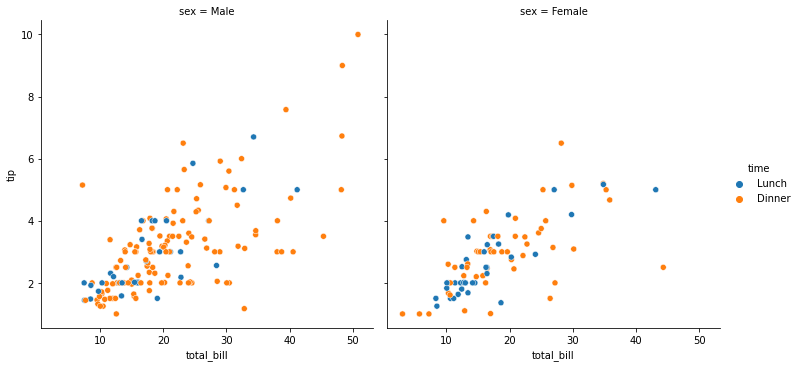

In [7]:
sns.relplot(data=df, x="total_bill", y="tip", hue="time", col="sex", kind="scatter")

--------------------
### Aufgabe 3: Explorative Datenanalyse (8 Punkte)

Ein Geysir ist eine heiße Quelle, die ihr Wasser als Fontäne ausstößt. Bei den meisten dieser Geysire findet dieser Ausstoß in unregelmäßigen Intervallen statt und ist somit schlecht vorhersagbar. Bei einigen gibt es allerdings Regelmäßigkeiten. Die dieser Aufgabe zugrundeliegenden Daten stammen von einem Geysir, der relativ vorhersagbar seine Fontäne bildet. 

Stellen Sie sich vor, ein Tourist möchte den Geysir einmal beim Ausbruch erleben. Er interessiert sich daher, für die Verhaltensmuster des Geysirs. Welche Hinweise können Sie ihm geben? Führen Sie auf den Daten eine explorative Datenanalyse durch, d.h. verwenden Sie Visualisierungen und ggf. statistische Analysetechniken, um dem Verhalten des Geysirs auf die Spur zu kommen. Erwartet werden mind. 3 Aussagen zu den Daten.

Abgabe: Eine Liste mit Hinweisen, die Sie geben können, sowie zugehörige Visualisierungen, die Ihre Thesen stützen. (Achten Sie darauf, dass klar wird, welche Hinweise Sie jeweils aus welchen Visualisierungen gezogen haben und dass Sie klar formulieren *was* man aus Ihrer Sicht jetzt aus dem Plot herauslesen kann.)

Daten: "Geysir.txt" mit den folgenden Spalten:
* eruptions: Dauer des Ausbruchs in Minuten
* waiting: Wartezeit bis zur nächsten Eruption in Minuten

Sie können zwischen Matplotlib und Seaborn als Library wählen.

In [8]:
sns.set_theme()

In [9]:
df = pd.read_csv("data/Geysir.txt", sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [10]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


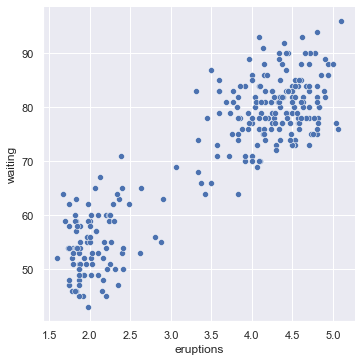

In [11]:
sns.relplot(data=df, x="eruptions", y="waiting", kind="scatter")

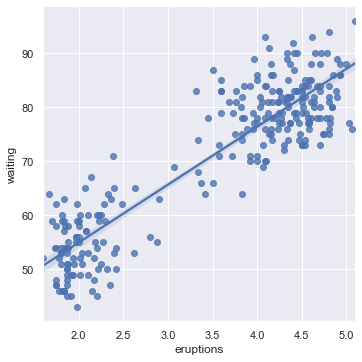

In [12]:
sns.lmplot(data=df, x="eruptions", y="waiting")

> Umso länger die Eruption des Geysir dauert, desto länger muss man als Besucher auch wieder warten, bis er das nächste mal speiht.

Das ist dem Scatterplot zu entnehmen. <br>An den beiden Dichtediagrammen ist das ebenfalls schön zu sehen. Es scheint hier 2 Typen von Eruptionen zu geben, die Langen und die Kurzen. Wo genau die Grenze ist wurde hierbei anhand der Daten geschätzt und könnte woanders liegen. Für unseren Fall ist die exakte Grenze jedoch nicht so relevant.<br>
Außerdem ist der angesprochene Zusammenhang von Wartezeit und Eruptionsdauer deutlich erkennbar.
<img src="density_plot_eruption.png"> <img src="density_plot_waiting.png">

---

In [13]:
print(df["waiting"].mean())
print(df["waiting"].median())
print("\n",df["eruptions"].mean())
print(df["eruptions"].median())

70.8970588235294
76.0

 3.4877830882352936
4.0


Im Durschnitt muss ein Besucher ca. 70 Minuten warten, bis er die nächste Eruption sieht und im Durchschnitt dauert diese dann ca. 3 1/2 Minuten. Wie man im Scatterplot erkennen kann, sind in diesen durchschnittlichen Bereichen fast keine Datenpunkte.<br>
Die Aussage ist also statistisch korrekt, aber es ist sehr unwahrscheinlich, das einem das auch wirklich passiert. Dieser Wert täuscht also durch die Ansammlung an den 2 Bereichen.

In [14]:
# Feature Extraction -> 2 Bereiche trennen 
conditions = [(df.eruptions < 3.5), (df.eruptions >= 3.5)]
values = ['short', 'long']
df["duration"] = np.select(conditions, values)

In [15]:
df["duration"].describe()

count      272
unique       2
top       long
freq       168
Name: duration, dtype: object

In [16]:
df["duration"].value_counts()

long     168
short    104
Name: duration, dtype: int64

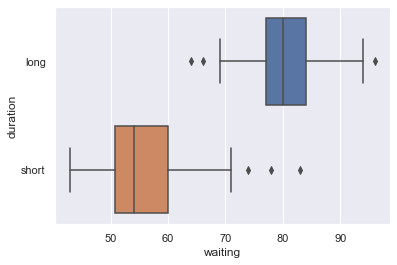

In [17]:
boxplot = sns.boxplot(data=df, x="waiting", y="duration")
boxplot.figure.savefig("./waiting_boxplot.png")

<AxesSubplot:xlabel='duration', ylabel='waiting'>

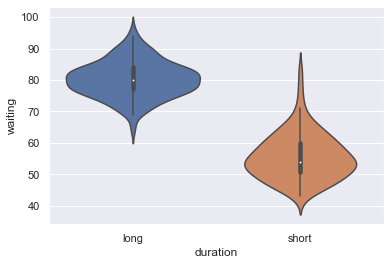

In [18]:
sns.violinplot(data=df, x="duration", y="waiting")

<AxesSubplot:xlabel='duration', ylabel='waiting'>

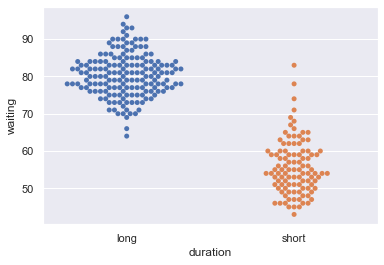

In [19]:
sns.swarmplot(data=df, x="duration", y="waiting")

Hier ist das gerade beschriebene nocheinmal besser zu sehen. Es scheint, als gäbe es 2 Dauerbereiche, in dem der Geysir Eruptionen entwickelt.<br>
Unter der Annahme, dass die Zeitmessungen dem normalen Muster des Geysir entsprechen, scheint sich ein Besucher auf eher länger andauernde Eruptionen und mit mehr Wartezeiten einstellen zu müssen. <br>
61,76% der Datenpunkte sind die längeren Eruptionen. Unterstützend dazu sollte man bedenken, dass die längeren Eruptionen mehr Zeit in anspruch nehmen und damit auch schwerer zu einer höheren Anzahl an Messungen kommen als die kürzeren Eruptionen. Somit sind die 61,76% mehr gewichted. <br>
<br>
Um das exakt anzugeben, werde ich nun die Zeiten vergleichen.

In [20]:
df[df['duration'] == 'long'].sum()

eruptions                                              727.694
waiting                                                  13496
duration     longlonglonglonglonglonglonglonglonglonglonglo...
dtype: object

In [21]:
df[df['duration'] == 'short'].sum()

eruptions                                              220.983
waiting                                                   5788
duration     shortshortshortshortshortshortshortshortshorts...
dtype: object

In [22]:
df.sum()

eruptions                                              948.677
waiting                                                  19284
duration     longshortshortshortlongshortlonglongshortlongs...
dtype: object

76,71% der Eruptiondauern, waren lange Eruptionen. Es ist also sicher, wenn man Eruptionen sehen möchte, wird man sich auf längere Wartezeiten, aber auch auf längere Eruptionen einstellen sollen..

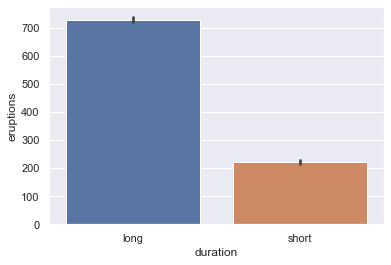

In [23]:
barplot = sns.barplot(x=df.duration, y=df.eruptions, estimator=sum)
barplot.figure.savefig("./duration_barplot.png")

Zwar brauchen die kurzen Eruptionen natürlich per Definition weniger Zeit in anspruch, aber könnten durch ihre geringere Wartezeit also durch öfteres speihen dies wieder ausgleichen.

---

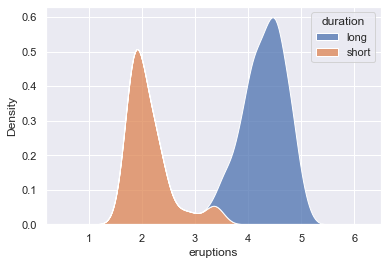

In [24]:
density_plot = sns.kdeplot(data=df, x="eruptions", hue="duration", multiple="stack")
density_plot.figure.savefig("./density_plot_eruption.png")

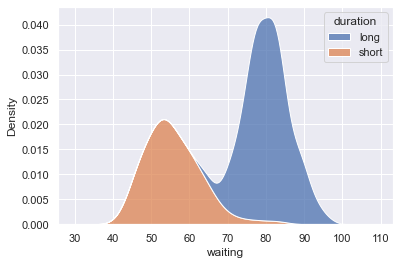

In [25]:
density_plot = sns.kdeplot(data=df, x="waiting", hue="duration", multiple="stack")
density_plot.figure.savefig("./density_plot_waiting.png")

Siehe oben auf Höhe des Scatterplots. Dort werden die Visualisierungen im Zusammenhang eingebunden.

---

In [26]:
#df.sum()[1] = summation des 'waiting' Features
#df.sum()[0] = summation des 'eruptions' Features
df.sum()[1]/(df.sum()[1]+df.sum()[0])

0.9531116421222956

95,31% der Zeit muss man warten...

---
---

## Resümee <br>

| These | Argumentation |
| ----------- | ----------- |
| Umso länger die Eruption des Geysir dauert, desto länger muss man als Besucher auch wieder warten, bis er das nächste mal speiht. | Erkennbar im Scatterplott und auch im Boxplot. <br> <br>Umso weiter die Datenpunkte rechts im Scatterplot liegen, desto weiter oben liegen sie auch. Man könnte eine grobe Regressionsgerade einzeichnen. <br>Bei dem Boxplot kann man die Wartezeiten im Vergleich sehen, die Grenze der Eruptionslänge liegt bei 3 1/2 Minuten.<br>Die längeren Eruptionen haben demnach auch eine längere Wartezeit. <br><br> <img src="waiting_boxplot.png" width=300> |
| Es ist wahrscheinlicher eine längere Eruption zu erleben. | Wie auf dem Barplot zu sehen ist, nehmen die längeren Eruptionen mehr Zeit ein und sind damit auch wahrscheinlicher zu sehen (was eine gute Nachricht für Fotografen sein dürfte).<br>Zudem sind 61,76% der Datenpunkte die längeren Eruptionen. Es gab also mehr längere Eruptionen und diese waren, natürlich, auch längere Zeit zu sehen.<br><br><img src = "duration_barplot.png" width = 400> |
| Die Wartezeit wird wahrscheinlich hoch sein. | Der Geysir scheint öfters längere Eruptionen zu entwickeln und dadurch entstehen dann wiederum längere Wartezeiten (siehe erste und zweite These).<br>In den Zahlen sieht man das unteranderem an der gesamten relativen Wartezeit, welche bei 95,31% liegt. Das zeigt beeindruckend, dass man sich auf viel Warten und wenig Eruptionen (beziehungsweise vergleichsweise kurze Eruptionen) vorbereiten sollte.|